## Week 2: Gambler's Ruin Problem and Mean Time Spent in Transient States 

* Simulating and analyzing the MC associated with the Gambler's Ruin Problem
* Studying the Mean TIme in Transient States (for Practice Problem)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Gambler's Ruin Problem

By modifying the 1D Random Walk (cf. week 1), we can simulate a trajectory of the Markov Chain associated with the Gambler's Ruin Problem

Initialization

In [2]:
x = []
# starting with $25
x.append(25)
# amount of money of the bank
N = 50

Simulation

In [3]:
# probability of winning a bet:
p = 0.5

while 0 < x[-1] < N:
    if np.random.rand() <= p:
        # winning $1 bet
        x.append(x[-1] + 1) 
    else:
        # losing $1 bet
        x.append(x[-1] - 1) 

Plotting the outcome of the simulation

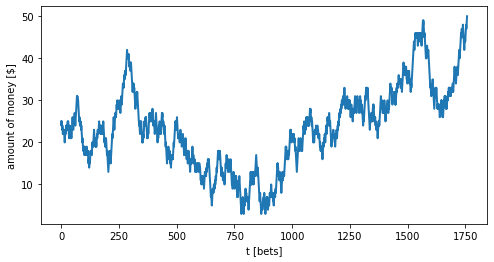

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_xlabel("t [bets]")
ax.set_ylabel("amount of money [$]")
ax.plot(x, lw=2)

By simulating the process many times, let's see what's the probability of ruin. We'll see in class how we can find this analyically.

In [5]:
# modify any of these parameters to see what happens
nrealizations = 1000
p = 0.50      # P(winning a bet)
N = 50      # money of bank
x0 = 40      # initial state

realizations = []

for r in range(nrealizations):
    x = [x0]
    while 0 < x[-1] < N:
        if np.random.rand() <= p: # (note that Lebesgue_measure(np.random.rand() = p) = 0)
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
    realizations.append(x)

# count the times of ruin
nruins = 0
for x in realizations:
    if x[-1] == 0:
        nruins += 1
        
print("Probability of ruin is approximately", nruins / nrealizations)

Probability of ruin is approximately 0.207


We now study the transient states (cf. lecture) {1, ..., N-1} and the probability of revisiting a state. For a state i, the following block allows to extract, from running M simulations over n steps with initial state i, what is the fraction of trajectories such that i was revisited. We set n large (1000), so the results of the simulations approximate the probability of return.

In [6]:
# modify any of these parameters again to see what happens
M = 1000      # number of simulations
n = 100       # number of steps
p = 0.49      # P(winning a bet)
N = 50      # money of bank
i = 25       # initial state

revisited = np.zeros(M)
for r in range(M):
    x = [i]
    step = 1
    while 0 < x[-1] < N and step <= n and revisited[r] != 1:
        if np.random.rand() <= p: 
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
        if x[-1] == i:
            revisited[r] = 1
        step += 1
            
print("Probability of revisiting until nth step is approximately", np.sum(revisited) / M)

Probability of revisiting until nth step is approximately 0.932


Let's also study the average number of times that a trajectory visited state i. The following block allows to extract this value

In [7]:
# modify any of these parameters again to see what happens
M = 1000      # number of simulations
n = 1000       # number of steps
p = 0.49      # P(winning a bet)
N = 50      # money of bank
i = 25      # initial state

visited = np.ones(M)
for r in range(M):
    x = [i]
    step = 1
    while 0 < x[-1] < N and step <= n:
        if np.random.rand() <= p:
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
        if x[-1] == i:
            visited[r] += 1
        step += 1

print("Mean number of visiting i =", i, "is", np.sum(visited) / M)

Mean number of visiting i = 25 is 21.834


By experimenting with this multiple times, let's compare the results for different possible values of p

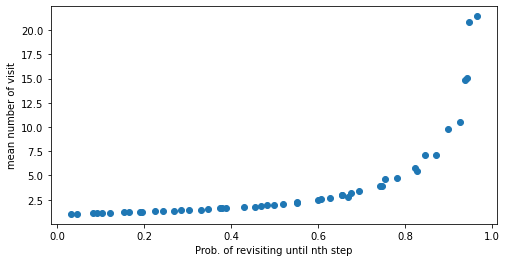

In [8]:
# Varying p
p_array = np.linspace(0.02, 0.98, num=50)

M = 1000      # number of simulations
n = 1000       # number of steps
N = 50      # money of bank
i = 25       # initial state

prob_revis = np.zeros(len(p_array))
mean_nvisit = np.zeros(len(p_array))
for idx, p in enumerate(p_array):
    visited = np.ones(M)
    for r in range(M):
        x = [i]
        step = 1
        while 0 < x[-1] < N and step <= n:
            if np.random.rand() <= p:
                # winning $1 bet
                x.append(x[-1] + 1) 
            else:
                # losing $1 bet
                x.append(x[-1] - 1)
            if x[-1] == i:
                visited[r] += 1
            step += 1
    prob_revis[idx] = len(np.where(visited > 1)[0]) / M
    mean_nvisit[idx] = np.sum(visited) / M

fig1, ax1 = plt.subplots(1, 1, figsize=(8, 4))
ax1.set_xlabel("Prob. of revisiting until nth step")
ax1.set_ylabel("mean number of visit")
ax1.plot(prob_revis, mean_nvisit, lw=0, marker="o")


These simulations suggest these two quantities are related. We'll prove and generalize this more precisely in class!

### Mean Time in Transient States

We consider here a finite state Markov Chain with a set of transient states numbered as $T= \left\{ 1, 2, \ldots, t \right\} $.

Let us define the transition matrix of transient states $\mathbf{P}_T$, such that $(\mathbf{P}_T)_{ij} = p_{ij} = P(X_1 =j \ | \ X_0=i)$ ($\mathbf{P}_T$ is a sub-matrix of the original full transition matrix of the Markov Chain). 

We also introduce the matrix $\mathbf{S}$ of size $t$, such that $(\mathbf{S})_{ij} = s_{ij}$ is the expected number of times where the Markov Chain is in state $j$, given it starts in state $i$. By conditioning on the initial transition (similarly as what we did when studying the probability of ruin in the Gambler's ruin problem), one can show that 

\begin{equation}
s_{ij} = \delta_{ij} + \sum_{k=1}^t p_{ik} s_{kj},
\end{equation}
which in matrix notation can be written as
\begin{equation}
\mathbf{S} = \mathbf{I} + \mathbf{P}_T \mathbf{S},
\end{equation} 
so 
\begin{equation}
\mathbf{S} = (\mathbf{I} - \mathbf{P}_T)^{-1}
\end{equation}

For a given matrix $\mathbf{P}_T$, the following block computes $\mathbf{S}$ (you can use it to solve practice problems, or find the probability of return $f_i$ associated with transient states (cf. properties of transience seen in class and section 4.6 in Ross textbook)).

In [9]:
# specify your PT
# PT = ...

# S = np.linalg.inv(np.identity(PT.shape[0]) - PT)

# Problem 5 - Solution

First, we import the Markov chain class from Notebook 1

In [10]:
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

## 1a.  Probabilities of return and time spent in transient states

In [11]:
#Initialising our Markov chain

# We first copy the transition matrix from Problem 1 - Week 2
transition_matrix = [[1/2, 1/2, 0, 0, 0, 0], 
                     [1/2, 1/2, 0, 0, 0, 0],
                     [0, 0, 1/2, 0, 1/2, 0],
                     [1/4, 1/4, 0, 0, 1/4, 1/4],
                     [0, 0, 1/2, 0, 1/2, 0],
                     [0, 1/3, 0, 1/3, 1/3, 0]]
markov_chain = MarkovChain(transition_matrix=transition_matrix, 
                            states=['1', '2', '3', '4', '5', '6']) # Name your states here

Introduce some useful functions

In [12]:
def run_simulations_markov_chain(markov_chain, nrealizations, nsteps, initial_state):
    sim_arr = np.zeros((nsteps, nrealizations))

    #Running many realizations
    for r in range(nrealizations):
        simulation= markov_chain.generate_states(current_state=initial_state, 
                                              no=nsteps)  
        sim_arr[:, r] = np.array(simulation)
    return sim_arr

def state_statistics(markov_chain, nrealizations, nsteps, initial_state):
    # Return the empirical probability of return and
    # the number of visits of some state 
    # starting from that state. 
    # This is only interesting when the state is transient.
    
    
    # Get the simulation results
    sim_arr = run_simulations_markov_chain(markov_chain, nrealizations, nsteps, initial_state)
    #Here we "call" i the transient initial_state
    N_i = 0
    f_i = 0

    hist = {1:0} # Initialize the histogram as a dictionnary
    sim_arr_transpose = np.transpose(sim_arr)
    for x in sim_arr_transpose:
        occurences_i = np.count_nonzero(x == int(initial_state))# If occurences is 0 then the state is not re-visited
        N_i = N_i + 1 + occurences_i # Add 1 to take into account the intial step X_0 = i
        does_return = (occurences_i>0) 
        f_i = f_i + does_return
        
        if 1+occurences_i in hist:
            hist[1+occurences_i] += 1
        else:
            hist[1+occurences_i] = 1
    return [N_i/nrealizations, f_i/nrealizations,hist]
        

In [13]:
# Compute the probability of returning 
# at some point to state i when starting 
# from state i.

# Choose a transient state
initial_state = '4' # in {'4','6'}
nrealizations = 1000
nsteps = 20

# Get its statistics
statistics = state_statistics(markov_chain, nrealizations, nsteps, initial_state)

The empirical average number of visits to 4 starting from 4 is 1.079
The empirical probability of returning to 4 starting from 4 is 0.072


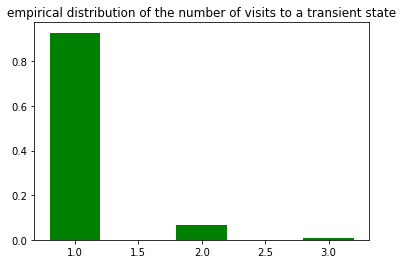

In [14]:

# Print the results
print("The empirical average number of visits to " + initial_state + 
      " starting from " + initial_state + " is", statistics[0])
print("The empirical probability of returning to " + initial_state + 
      " starting from " + initial_state + " is", statistics[1])
hist = statistics[2]

# renormalize the probability distribution
total = sum(hist.values())
factor = 1/total
normalized_hist =  {key:value*factor for key,value in hist.items()}

plt.title('empirical distribution of the number of visits to a transient state')
plt.bar(list(normalized_hist.keys()), normalized_hist.values(), color='g', width=0.4)
plt.show()

## 1b. Theoretical value and comparison with the simulations

We let $N_i$ be the random variable equal to the time spent in state $i$. We know from the the theoretical discussion and proof above that for any transient state of some discrete and finite Markov chain $X$, the following holds,
\begin{equation}
\mathbf{S} = (\mathbf{I} - \mathbf{P}_T)^{-1}
\end{equation}

Where $S_{ij} = \mathbb{E}(N_j \mid X_0 = i)$ and ${P_T}_{i,j}$ are restricted to the subset of transient states. This enables us in particular to determine $\mathbb{E}(N_i \mid X_0 = i)$.

Here, we are interested in determining the value of $f_i = \mathbb{P}(X_n = i,\text{ for some } n>0  \mid X_0 = i)$ that is the probability of never coming back to $i$ when starting from $i$. But we know from the lectures that by the geometric law of $N_i$ the following holds 
\begin{equation}
        \mathbb{E}(N_i \mid X_0 = i) = \frac{1}{1- f_i}.
\end{equation}

And thus that,
\begin{equation}
        f_i = 1- \frac{1}{\mathbb{E}(N_i \mid X_0 = i)}.
\end{equation}

Then, once that $f_i$ is deduced, we are almost done with determining the law of $N_i$ for $X$ started at $i$ since it satisfies for $k \geq 1$,

\begin{equation}
        \mathbb{P}(N_i = k \mid X_0 = i) = (1-f_i){f_i}^{k-1}.
\end{equation}


We are now ready to apply this strategy in our particular setting.

In [15]:
# specify your PT
# This is the submatrix of P
# containing the transient states only
# Since only {4,6} are transient, this 
# is a 2x2 matrix.

PT = np.matrix([[0,1/4],
                [1/3,0]])

S = np.linalg.inv(np.identity(PT.shape[0]) - PT)
print("The matrix S we are looking for is:")
print(S)

# We can consider the state '4' for example
# but '6' would also work and would correspond
# to S[1,1].

f_4 =  1-1/(S[0,0])
print("So the value of f_4 is",f_4)

The matrix S we are looking for is:
[[1.09090909 0.27272727]
 [0.36363636 1.09090909]]
So the value of f_4 is 0.08333333333333326


We can now deduce the theoretical probability distribution of $N_i$ and compare with the one obtained before.

[1, 3, 2]


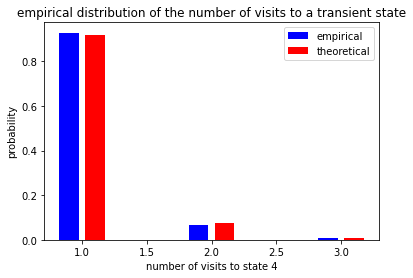

In [16]:
# Using the just obtained value for f_4 we get

L = len(normalized_hist.keys())
true_hist = {}
for i in range(L):
    true_hist[i+1] = (1-f_4)*f_4**(i)

# Comparing the two histograms
plt.title('empirical distribution of the number of visits to a transient state')
plt.xlabel('number of visits to state 4')
plt.ylabel('probability')
print(list(normalized_hist.keys()))
plt.bar([x-0.1 for x in list(normalized_hist.keys())], normalized_hist.values(), color='b', width=0.15, label = 'empirical')
plt.bar([x+0.1 for x in list(true_hist.keys())], true_hist.values(), color='r', width=0.15, label="theoretical")
plt.legend()
plt.show()

## 2. Gambler's ruin

We proceed similarly as before

In [17]:
# modify any of these parameters again to see what happens
M = 1000      # number of simulations
n = 1000       # number of steps
p = 0.40      # P(winning a bet)
q = 1 - p     # P(losing a bet)
N = 50      # money of bank
i = 25      # initial state

gamblers_hist = {1:0} # Initialize the histogram as a dictionnary

visited = np.zeros(M)

# Run a lot of simulations and complete
# the histogram on the go
for r in range(M):
    count = 1
    x = [i]
    step = 1
    while 0 < x[-1] < N and step <= n:
        if np.random.rand() <= p:
            # winning $1 bet
            x.append(x[-1] + 1) 
        else:
            # losing $1 bet
            x.append(x[-1] - 1)
        if x[-1] == i:
            count += 1
        step += 1
    visited[r] += count
    # add an element to the histogram
    if count in gamblers_hist:
        gamblers_hist[count] += 1
    else:
        gamblers_hist[count] = 1

# renormalize the empirical probability distribution
total = sum(gamblers_hist.values())
factor = 1/total
normalized_gamblers_hist =  {key:value*factor for key,value in gamblers_hist.items()}

print("Mean number of visiting i =", i, "is", np.sum(visited) / M)

Mean number of visiting i = 25 is 5.092


In [18]:
# specify your PT
# This is the submatrix of P
# containing the transient states only

# Constructing the matrix PT
PT = np.diag(q*np.ones(N), k=-1) + np.diag(p*np.ones(N), k=1) 
PT[0, :] = 0
PT[0, 0] = 1
PT[N, :] = 0
PT[N, N] = 1
A = [0, N]
B = range(1, N)
PT = PT[np.ix_(B, B)]

# Compute S
S = np.linalg.inv(np.identity(PT.shape[0]) - PT)

# Evaluate S[i-1,i-1] to obtain the 
# expected number of return to i
# starting from i.

f =  1-1/(S[i-1,i-1])
print("So the value of f is",f)

So the value of f is 0.7999841585214268


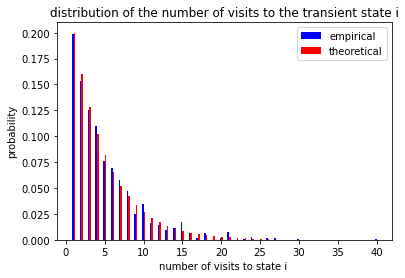

In [19]:
### Comparing the two histograms

# First compute the theoretical histogram
# with the formula seen in the lecture

# Initialize the size
L = len(normalized_gamblers_hist.keys())
true_gamblers_hist = {}

# Compute the probability distribution with the 
# formula from the lectures
for i in range(L):
    true_gamblers_hist[i+1] = (1-f)*f**i


# Plotting
plt.title('distribution of the number of visits to the transient state i')
plt.xlabel('number of visits to state i ')
plt.ylabel('probability')

plt.bar([x-0.1 for x in list(normalized_gamblers_hist.keys())], 
        normalized_gamblers_hist.values(), 
        color='b', width=0.2, label = 'empirical')
plt.bar([x+0.1 for x in list(true_gamblers_hist.keys())], 
        true_gamblers_hist.values(), 
        color='r', width=0.2, label="theoretical")
plt.legend()
plt.show()